### Part 1 : Voronoi mesh generation

In [10]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys
#adding path to source directory
sys.path.insert(0, '../voronoiMeshMF6')
import geopandas as gpd
from geoVoronoi import createVoronoi
from geoUtils import plotOrgDistPoints, plotCirclesPoints, plotKeyList


/--------Sumary of cell discretization-------/
Maximun refinement: 100.00 m.
Minimum refinement: 10.00 m.
Cell size list: [100.   77.5  55.   32.5  10. ] m.
/--------------------------------------------/


/----Sumary of points for voronoi meshing----/
Distributed points from layers: 920
Points from layer buffers: 2159
Points from max refinement areas: 398
Points from min refinement areas: 1335
Total points inside the limit: 4578
/--------------------------------------------/

Time required for point generation: 1.08 seconds 

Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Po

In [ ]:
#Create mesh object
vorMesh = createVoronoi()

#Define base refinement and refinement levels
vorMesh.defineParameters(maxRef = 100, minRef=10, multiplier=1.5)

#Open limit layers and refinement definition layers
vorMesh.addLimit('basin','../../examples/riverAquiferInteraction/Shp/ModelLimit1.shp')
vorMesh.addLayer('ghb','../../examples/riverAquiferInteraction/Shp/ModelGHB1.shp',20)
vorMesh.addLayer('riv','../../examples/riverAquiferInteraction/Shp/ModelRiver2.shp',10)
vorMesh.addLayer('wel','../../examples/riverAquiferInteraction/Shp/ModelWell2.shp',2)

#Generate point pair array
vorMesh.extractOrgVertices()

#Generate the point cloud and voronoi
vorMesh.createPointCloud()
vorMesh.generateVoronoi()

#check or create an output folder
outPath = '../examples/siteDewatering/output'
if os.path.isdir(outPath):
    print('The output folder %s exists'%outPath)
else:
    os.mkdir(outPath)
    print('The output folder %s has been generated.'%outPath)

#Export point data and voronoi polygons
#Points
vorMesh.getPointsAsShp('vertexOrg',outPath+'/vertexOrg.shp')
vorMesh.getPointsAsShp('vertexDist',outPath+'/vertexDist.shp')
vorMesh.getPointsAsShp('vertexBuffer',outPath+'/vertexBuffer.shp')
vorMesh.getPointsAsShp('vertexMaxRef',outPath+'/vertexMaxRef.shp')
vorMesh.getPointsAsShp('vertexMinRef',outPath+'/vertexMinRef.shp')
vorMesh.getPointsAsShp('vertexTotal',outPath+'/vertexTotal.shp')
#Polygons

vorMesh.getPolyAsShp('voronoiRegions',outPath+'/voronoiRegions.shp')


In [11]:
# Show the resulting voronoi mesh

#open the mesh file
mesh=gpd.read_file(outPath+'/voronoiRegions.shp')

<Axes: >

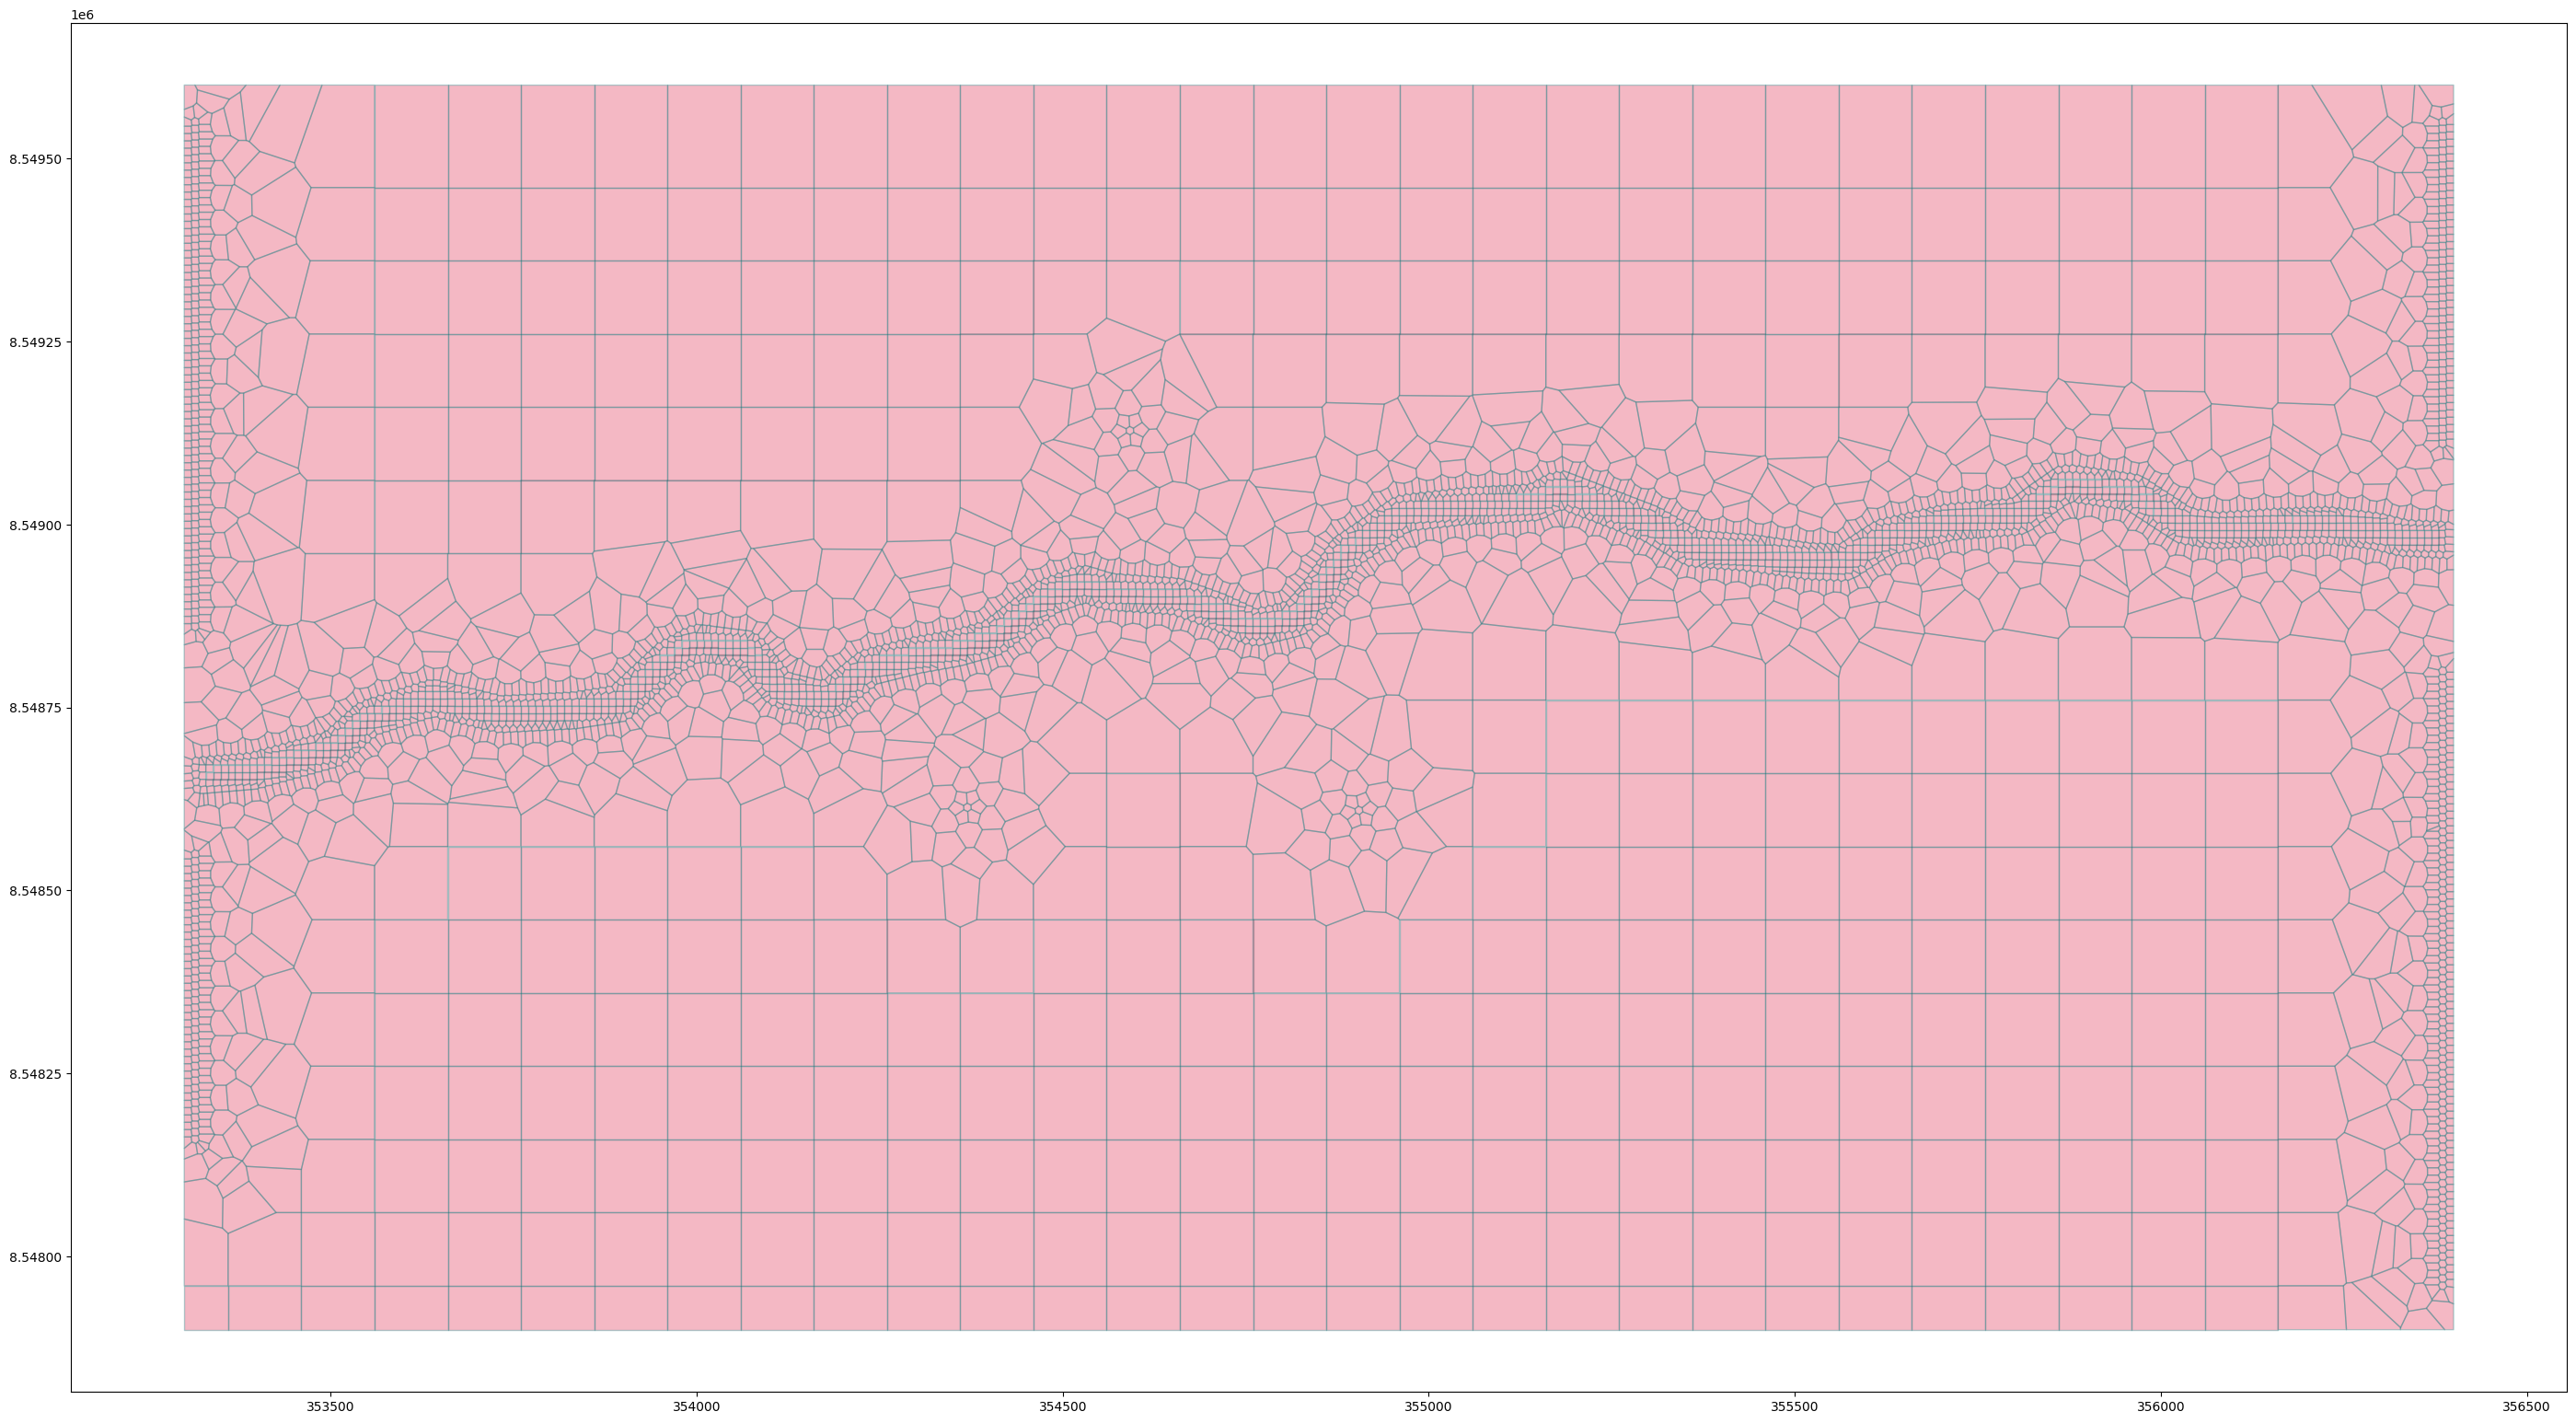

In [12]:
#plot the mesh
mesh.plot(figsize=(35,25), fc='crimson', alpha=0.3, ec='teal')